In [1]:
from sklearn.datasets import make_blobs
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cross_validation import train_test_split
from scipy.stats import mode
X, yy= make_blobs(n_samples=300, n_features=2, centers=2,cluster_std=0.5,shuffle=True,random_state=0)
%matplotlib inline

In [2]:
def sim(X1,X2):
    a=X1-X2
    dist=sum(a**2)
    return dist

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,yy,test_size=0.3,random_state=0)

In [4]:
def ONN(X,ref,refy):
    trainy=[]
    for i in range(len(X)):
        sett=[]
        for j in range(len(ref)):
            sett.append(sim(X[i,],ref[j,]))
        trainy.append(refy[sett.index(np.min(sett))])
    return trainy

In [5]:
def KNN(X_test,X_train,refy,k):
    trainy=[]
    for i in range(len(X_test)):
        count=[]
        sett=[]
        for j in range(len(X_train)):
            sett.append(sim(X_test[i,],X_train[j,]))
        tmp=sett[:]
        sett.sort()
        candiset=sett[0:(k-1)]
        for l in range(len(candiset)):
            count.append(refy[tmp.index(candiset[l])])
        trainy.append(mode(count)[0][0])
    return trainy

In [6]:
r=ONN(X_test,X_train,y_train)

In [7]:
col=[]
marker=[]
for i in range(len(X_test)):
    if r[i]==0:
        col.append('red')
    else: col.append('blue')
for i in range(len(X_test)):
    if y_test[i]==0:
        marker.append('x')
    else: marker.append('o')

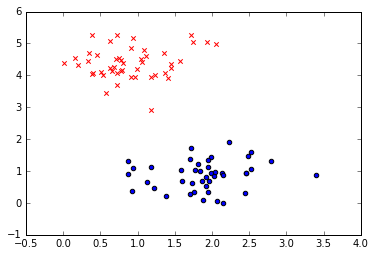

In [8]:
for i in range(len(X_test)):
    plt.figure(0)
    plt.scatter(X_test[i,0],X_test[i,1],c=col[i] ,marker=marker[i])